<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QuantumTeleportation_01_Grok_mkbahk_20250318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 동작하지 않는 코드

In [2]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=174f783b9875a81efd7df2c6567a1401eefde3bc5d3bceda9ea368dd9ba0b87f
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.8 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [3]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [57]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from qiskit.quantum_info import Statevector

# Quantum Teleportation: q[0]의 상태값을 q[1]에 복사시키는 것
## 왜, 양자역할이론에서 복사불가정리(no-cloning theorem)에 의하여 Qubit간에 복사가 되지 않는데, 복사는 하는 효과를 낼 수 있음.

In [40]:
# 양자 및 고전 레지스터 생성
qr = QuantumRegister(3, name='q')  # q0: Alice의 전송할 큐비트, q1: 얽힌 쌍(Alice), q2: 얽힌 쌍(Bob)
cr = ClassicalRegister(2, name='c')  # 고전 비트로 측정 결과 저장
circuit = QuantumCircuit(qr, cr)

# 1단계: Alice가 전송할 임의의 양자 상태 준비 (예: |ψ⟩ = α|0⟩ + β|1⟩)
# 여기서는 간단히 |1⟩ 상태로 설정
circuit.x(qr[0])  # |1⟩ 상태로 초기화
circuit.barrier()

# 2단계: Alice와 Bob 간 얽힌 쌍(Bell State) 생성
circuit.h(qr[1])           # Hadamard 게이트로 중첩 상태 생성
circuit.cx(qr[1], qr[2])   # CNOT 게이트로 얽힘 생성 (|00⟩ + |11⟩)/√2
circuit.barrier()

# 3단계: Alice가 자신의 큐비트(q0)와 얽힌 큐비트(q1)를 측정
circuit.cx(qr[0], qr[1])   # q0와 q1 간 CNOT
circuit.h(qr[0])           # q0에 Hadamard 적용
circuit.barrier()
circuit.measure(qr[0], cr[0])  # q0 측정
circuit.measure(qr[1], cr[1])  # q1 측정
circuit.barrier()

# 4단계: Bob이 고전 비트 결과에 따라 조건부 연산 수행
circuit.cx(qr[1], qr[2])   # cr[1]이 1이면 X 게이트 적용
circuit.cz(qr[0], qr[2])   # cr[0]이 1이면 Z 게이트 적용

Quantum Teleportation 회로:


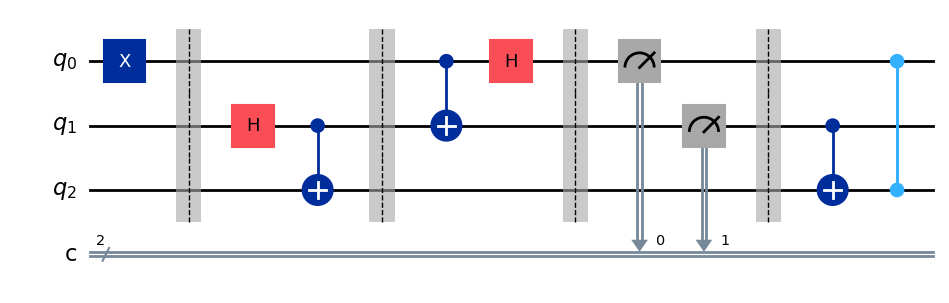

In [41]:
# 회로 시각화
print("Quantum Teleportation 회로:")
circuit.draw("mpl")

In [43]:
# 시뮬레이션 실행
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit, shots=1024)
result = job.result()
counts = result.get_counts()

In [44]:
# 결과 출력
print("\n측정 결과:", counts)


측정 결과: {'11': 253, '01': 258, '10': 255, '00': 258}


In [52]:
# 상태 벡터 시뮬레이션 (텔레포트된 상태 확인용)
state_simulator = Aer.get_backend('statevector_simulator')
circuit_no_measure = QuantumCircuit(qr)  # 측정 제거한 회로
circuit_no_measure.x(qr[0])
circuit_no_measure.h(qr[1])
circuit_no_measure.cx(qr[1], qr[2])
circuit_no_measure.cx(qr[0], qr[1])
circuit_no_measure.h(qr[0])
circuit_no_measure.cx(qr[1], qr[2])
circuit_no_measure.cz(qr[0], qr[2])

In [53]:
job_state = state_simulator.run(circuit_no_measure, shot=1024)
state_result = job_state.result()
statevector = state_result.get_statevector()
print("\nBob의 큐비트(q2)의 최종 상태 벡터:", statevector)


Bob의 큐비트(q2)의 최종 상태 벡터: Statevector([0. +0.000000e+00j, 0. +0.000000e+00j, 0. +0.000000e+00j,
             0. +0.000000e+00j, 0.5-6.123234e-17j, 0.5-6.123234e-17j,
             0.5-6.123234e-17j, 0.5-6.123234e-17j],
            dims=(2, 2, 2))


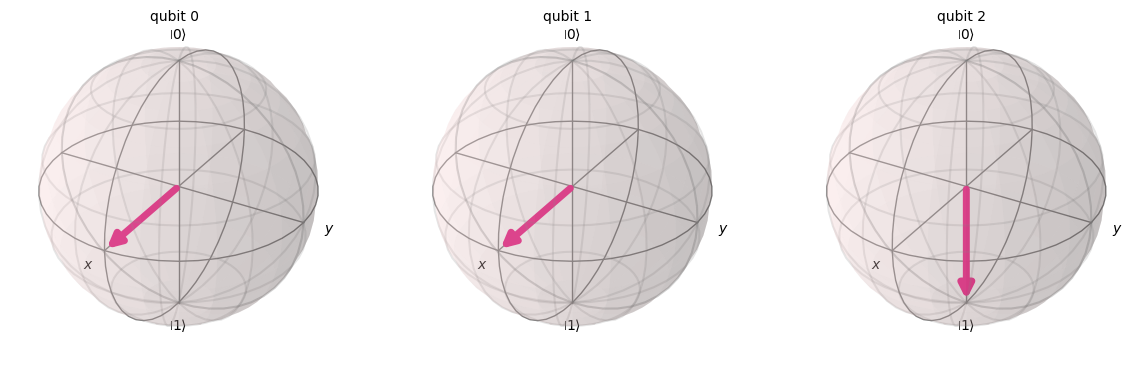

In [60]:
plot_bloch_multivector(statevector)